In [1]:
#importing necessary libraries
import shap
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns in DataFrame output
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
import tensorflow as tf
# Compute class weights to handle imbalance
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('imdb_cleaned.csv')
df

,startYear,runtimeMinutes,totalCredits,numRegions,ratingCount,castNumber,companiesNumber,writerCredits,directorsCredits,totalNominations,totalMedia,totalReviews,Asia,Africa,Europe,North America,South America,Oceania,Continent Unknown,genre1,genre2,genre3,movie,short,tvEpisode,tvMiniSeries,tvMovie,tvSeries,tvShort,tvSpecial,video,videoGame,rating_bin
0,1894,1,1,5,195,0,1,0,1,0,5,0,0,0,4,1,0,0,0,16787,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1895,1,3,7,1235,0,2,0,1,0,7,5,0,0,5,1,0,0,1,16787,16581,0,0,1,0,0,0,0,0,0,0,0,1
2,1895,1,3,8,1104,0,2,0,1,0,7,6,0,0,5,1,1,0,1,47408,16787,16581,0,1,0,0,0,0,0,0,0,0,1
3,1896,1,2,4,84,0,1,0,1,0,3,0,0,0,2,1,0,0,1,47408,16787,0,0,1,0,0,0,0,0,0,0,0,1
4,1898,1,5,1,220,3,2,0,1,0,3,1,0,0,0,1,0,0,0,16787,16581,2702,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144907,1993,96,11,1,11,0,2,1,1,0,1,0,0,0,0,0,1,0,0,16581,0,0,1,0,0,0,0,0,0,0,0,0,3
144908,2019,14,52,1,15,6,3,1,1,3,10,1,0,0,1,0,0,0,0,51745,16787,0,0,1,0,0,0,0,0,0,0,0,2
144909,2019,29,32,0,12,1,0,0,0,0,5,0,0,0,0,0,0,0,0,5726,0,0,0,0,1,0,0,0,0,0,0,0,1
144910,2011,10,15,0,10,7,0,3,1,0,1,0,0,0,0,0,0,0,0,47408,17855,17763,0,0,1,0,0,0,0,0,0,0,3


# averageRating

In [3]:
%%time

# Splitting the dataset into features (X) and target (y)
X = df.drop(columns=['rating_bin'])  # Features
y = df['rating_bin']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

CPU times: total: 141 ms
Wall time: 148 ms


In [4]:
# Neural network for remapped y (averageRating bins)
model_rating = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(6, activation='softmax')
])

model_rating.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

NameError: name 'Input' is not defined

In [ ]:
# Class weight options: 'balanced', None, or custom dict

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

In [11]:
history_rating = model_rating.fit(
    X_train_scaled, y_train,
    epochs=100, batch_size=64, validation_split=0.2,
    class_weight={i: w for i, w in enumerate(class_weights)}
)



Epoch 1/100
1450/1450 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2343 - loss: 1.6071 - val_accuracy: 0.2580 - val_loss: 1.6078
Epoch 2/100
1450/1450 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2634 - loss: 1.5460 - val_accuracy: 0.2792 - val_loss: 1.6083
Epoch 3/100
1450/1450 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2759 - loss: 1.5306 - val_accuracy: 0.2999 - val_loss: 1.5701
Epoch 4/100
1450/1450 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2821 - loss: 1.5209 - val_accuracy: 0.2977 - val_loss: 1.5581
Epoch 5/100
1450/1450 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2877 - loss: 1.5136 - val_accuracy: 0.2692 - val_loss: 1.6226
Epoch 6/100
1450/1450 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2884 - loss: 1.5063 - val_accuracy: 0.2964 - val_loss: 1.5783
Epoch 7/100
1450/1450 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2949 - loss: 1.5023 - val_accuracy: 0.3047 - val_loss: 1.5528
Epoch 8/100
1450/1450 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2950 - loss: 1

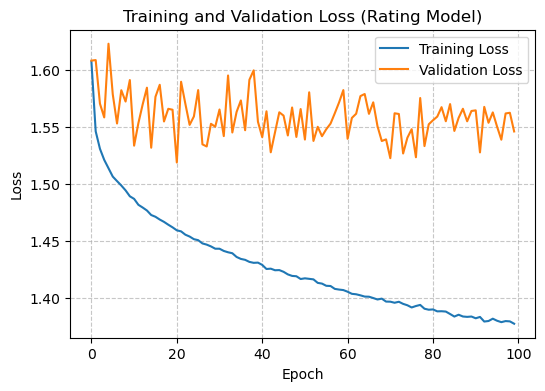

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(history_rating.history['loss'], label='Training Loss')
plt.plot(history_rating.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Rating Model)')
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.show()

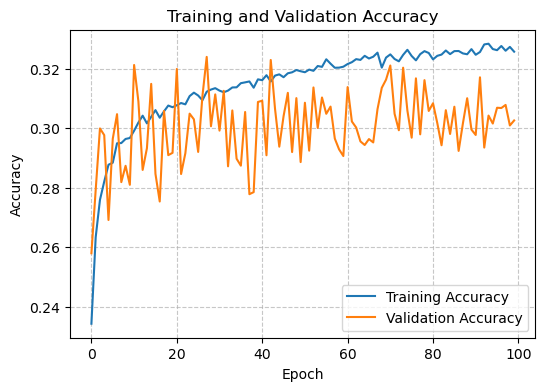

In [15]:
plt.figure(figsize=(6, 4))
plt.plot(history_rating.history['accuracy'], label='Training Accuracy')
plt.plot(history_rating.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(alpha=0.7, linestyle='--')
plt.show()

906/906 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step
Test set accuracy: 0.3007

Classification report:
              precision    recall  f1-score   support

           0   0.266421  0.524366  0.353324      2483
           1   0.290496  0.262136  0.275588      3708
           2   0.372573  0.248177  0.297911      7269
           3   0.505600  0.264269  0.347110      9566
           4   0.289428  0.304689  0.296863      4969
           5   0.104809  0.602227  0.178545       988

    accuracy                       0.300694     28983
   macro avg   0.304888  0.367644  0.291557     28983
weighted avg   0.373502  0.300694  0.311792     28983



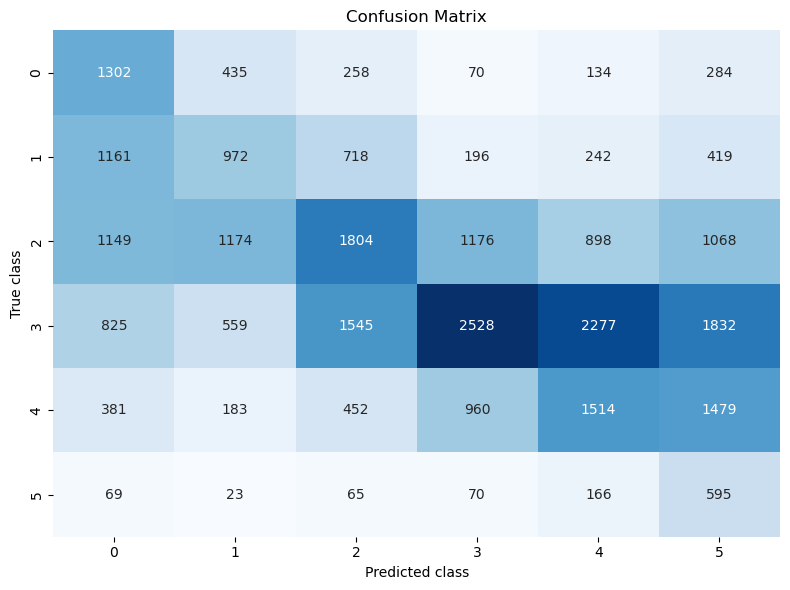

In [24]:
# Making predictions
y_pred = model_rating.predict(X_test_scaled)
# Get predicted class labels
y_pred_classes = y_pred.argmax(axis=1)  # pick the class with highest probability

# Accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Test set accuracy: {accuracy:.4f}\n")

# Classification report
print("Classification report:")
print(classification_report(y_test, y_pred_classes, digits=6))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title("Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("True class")

# # Center the tick labels
# plt.xticks(ticks=range(6), labels=[0,1,2,3,4,5], ha='center')
# plt.yticks(ticks=range(6), labels=[0,1,2,3,4,5], rotation=0, va='center')

plt.tight_layout()
plt.show()


In [ ]:
# Use a small subset of training data as background (helps SHAP efficiency)
background = X_train_scaled[np.random.choice(X_train_scaled.shape[0], 100, replace=False)]

# Create SHAP explainer for Keras model
explainer = shap.DeepExplainer(model_rating, background)

# Compute SHAP values for test set
shap_values = explainer.shap_values(X_test_scaled)  # List of arrays, one per class


c:\Users\tanya\anaconda3\Lib\site-packages\shap\explainers\_deep\deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
c:\Users\tanya\anaconda3\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_7
Received: inputs=['Tensor(shape=(100, 32))']
  warnings.warn(msg)
c:\Users\tanya\anaconda3\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_7
Received: inputs=['Tensor(shape=(200, 32))']
  warnings.warn(msg)
c:\Users\tanya\anaconda3\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_7
Received: inputs=['Tensor(shape=(28983, 32))'

KeyError: "['averageRating'] not found in axis"

In [27]:
# --- Visualization ---

# Summary plot for class 0 (you can loop over classes)
shap.summary_plot(shap_values[0], X_test_scaled, feature_names=df.drop(columns=['rating_bin']).columns)

# Bar plot (mean absolute SHAP values) for class 0
shap.summary_plot(shap_values[0], X_test_scaled, plot_type="bar", feature_names=df.drop(columns=['rating_bin']).columns)

# Optional: force plot for a single prediction (interactive, Jupyter only)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test_scaled[0])

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

# SHAP Model try 1

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# 1. Load model
model_rating = keras.models.load_model("neural_net_rating_model.keras")

#2. Prepare data
feature_columns = [c for c in df.columns if c != 'rating_bin']
X = df[feature_columns].values
y = df['rating_bin'].values

# Split into train and test (if you don't already have them)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Background for SHAP (sample for efficiency)
X_background = X[np.random.choice(X.shape[0], 100, replace=False)]

In [7]:
X

array([[1894,    1,    1, ...,    0,    0,    0],
       [1895,    1,    3, ...,    0,    0,    0],
       [1895,    1,    3, ...,    0,    0,    0],
       ...,
       [2019,   29,   32, ...,    0,    0,    0],
       [2011,   10,   15, ...,    0,    0,    0],
       [2019,   42,   33, ...,    0,    0,    0]], dtype=int64)

In [ ]:
# 3. Create DeepExplainer
explainer = shap.DeepExplainer(model_rating, X_background)

# 4. Explain test samples
X_test_scaled = scaler.transform(X_test)  # Ensure test data is scaled
X_test = X_test_scaled  # Use the scaled test set from earlier
X_test_sample = X_test[:50]   # pick a small subset for SHAP
shap_values = explainer.shap_values(X_test_sample)

# shap_values is a list with length = number of classes (6 here)
print(len(shap_values))  # should print 6

In [ ]:
# 5. Global explanation for one class (say class 0)
shap.summary_plot(shap_values[0], X_test_sample, feature_names=feature_columns)

In [ ]:
# 6. Compare feature importance across all 6 classes
for i in range(len(shap_values)):
    print(f"Explaining class {i}")
    shap.summary_plot(shap_values[i], X_test_sample, feature_names=feature_columns)

In [ ]:

# 7. Local explanation for a single prediction (say index 0 in test sample)
sample_idx = 0
shap.force_plot(
    explainer.expected_value[0],
    shap_values[0][sample_idx, :],  # SHAP for class 0
    feature_names=feature_columns,
    matplotlib=True
)
plt.show()